## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

micemerge_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID" )

# Display the data table for preview

micemerge_df.round(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [2]:
# Checking the number of mice.

# mice count
mice_count = len(micemerge_df["Mouse ID"].unique())


# add a frame to display 

mice_count_df = pd.DataFrame({"Total Mice":[mice_count]})

mice_count_df




,Total Mice
0,249


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicatemice = micemerge_df.loc[micemerge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicatemice = micemerge_df.loc[micemerge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()



In [25]:
duplicatemice

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df[df["column"].isin(["value"]) == False]


clean_mice = micemerge_df[micemerge_df["Mouse ID"].isin(duplicatemice)==False]

clean_mice.round(4)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0000,0
1,k403,Ramicane,Male,21,16,5,38.8259,0
2,k403,Ramicane,Male,21,16,10,35.0143,1
3,k403,Ramicane,Male,21,16,15,34.2240,1
4,k403,Ramicane,Male,21,16,20,32.9977,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.1457,2
1889,z969,Naftisol,Male,9,30,30,65.8410,3
1890,z969,Naftisol,Male,9,30,35,69.1762,4
1891,z969,Naftisol,Male,9,30,40,70.3149,4


In [28]:
# Checking the number of mice in the clean DataFrame.

mice_cleancount = len(clean_mice["Mouse ID"].unique())

mice_cleancountdf = pd.DataFrame({"Total Mice":[mice_cleancount]})

mice_cleancountdf






,Total Mice
0,248


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#summary_stats = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe())

mean = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
std = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
variance = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sem = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Standard Deviation": std,
                              "Variance": variance,
                              "SEM": sem
                                })

summary_stats.round(4)




#summary_stats["Mean"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

#summary_stats["Median"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

#summary_stats["Standard Deviation"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

#summary_stats["Variance"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

#summary_stats["SEM"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Assemble the resulting series into a single summary dataframe




,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,4.9948,24.9478,0.3293
Ceftamin,52.5912,51.7762,6.2682,39.2902,0.4698
Infubinol,52.8848,51.8206,6.5672,43.1287,0.4922
Ketapril,55.2356,53.6987,8.2797,68.5536,0.6039
Naftisol,54.3316,52.5093,8.1347,66.1735,0.5965
Placebo,54.0336,52.2889,7.8210,61.1681,0.5813
Propriva,52.3226,50.8546,6.5078,42.3511,0.5129
Ramicane,40.2167,40.6732,4.8463,23.4867,0.3210
Stelasyn,54.2331,52.4317,7.7104,59.4506,0.5731


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

summary_stats_agg = micemerge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


summary_stats_agg.round(4)


Tumor Volume (mm3)                                  
                           mean   median      var     std     sem
Drug Regimen                                                     
Capomulin               40.6757  41.5578  24.9478  4.9948  0.3293
Ceftamin                52.5912  51.7762  39.2902  6.2682  0.4698
Infubinol               52.8848  51.8206  43.1287  6.5672  0.4922
Ketapril                55.2356  53.6987  68.5536  8.2797  0.6039
Naftisol                54.3316  52.5093  66.1735  8.1347  0.5965
Placebo                 54.0336  52.2889  61.1681  7.8210  0.5813
Propriva                52.3226  50.8546  42.3511  6.5078  0.5129
Ramicane                40.2167  40.6732  23.4867  4.8463  0.3210
Stelasyn                54.2331  52.4317  59.4506  7.7104  0.5731
Zoniferol               53.2365  51.8185  48.5334  6.9666  0.5164

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Measurements')

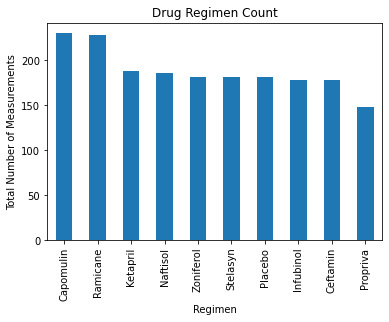

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_bar = clean_mice["Drug Regimen"].value_counts().plot.bar()

plt.title("Drug Regimen Count")
plt.xlabel("Regimen")
plt.ylabel("Total Number of Measurements")



In [11]:
drug_total

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 

#micemerge_df[micemerge_df["Mouse ID"].isin(duplicatemice)==True].round(2)
micemerge_df.loc[micemerge_df["Mouse ID"] == "g989", :].round(2)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

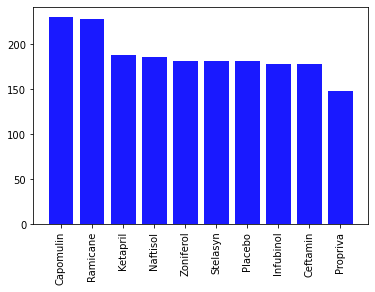

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_total.index, drug_total, color='b', alpha=0.9, align="center")
plt.xticks(rotation=90)



Text(0.5, 1.0, 'Mice Gender')

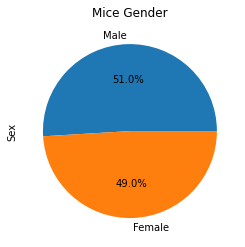

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = clean_mice["Sex"].value_counts()

gender_mice.plot(kind="pie", autopct="%1.1f%%")

plt.title("Mice Gender")


Text(0.5, 1.0, 'Mice Gender')

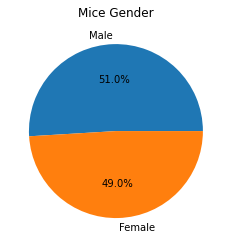

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice, labels=gender_mice.index,autopct="%1.1f%%")

plt.title("Mice Gender")


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


#max_timepoint = pd.DataFrame(micemerge_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index()

#final_tumor = max_timepoint["Mouse ID", "Timepoint"]

capomulin = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Capomulin"]
ramicane = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Ramicane"]
infubinol = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Infubinol"]
ceftamin = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Ceftamin"]
timepoint45 = micemerge_df.loc[micemerge_df["Timepoint"] == 45] 

#mouseidgroup = pd.DataFrame(micemerge_df.groupby("Mouse ID"))

#mouseidgroup2 = pd.DataFrame({"":[mice_count]})

#test_df = pd.DataFrame({"Capomulin": [capomulin],
                       # "ramicane": [ramicane]})
                                      
#test_df.head()

test_df = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Capomulin"]
test_df.head()



#drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
